In [1]:
import qiskit as qk
from qiskit import IBMQ

In [2]:
IBMQ.load_account()

C:\Users\panul\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit import *
%matplotlib inline

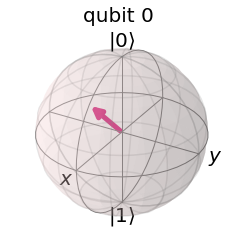

In [305]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr,cr)
#preparing the state:
theta = pi/2
circuit.u(theta,pi/4,1,0) #theta, phi, lambda, qubit

#rotate theta about x
circuit.rx(theta,0)
#circuit.ry(pi/4,0)
#circuit.h(0)
#circuit.ry(pi/2, 1)
#circuit.cz(qr[0],qr[1])

backend = Aer.get_backend('statevector_simulator')
out = qk.execute(circuit,backend).result().get_statevector()
plot_bloch_multivector(out)

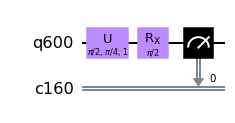

In [306]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

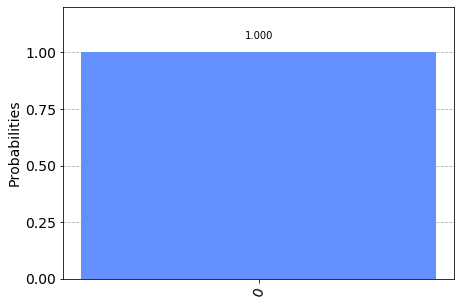

In [296]:
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
plot_histogram(result.get_counts(circuit))

In [297]:
#p0 = result.get_counts(circuit)[0]
print(result.data(circuit))
print(result.get_counts(circuit))
print(len(result.data(circuit)))

{'counts': {'0x0': 1024}}
{'0': 1024}
1


In [301]:
# I found that without gates theta=arccos(2*P[0]-1) 
# but my python skills didn't allow me to extract the elements of the result array.

# When correctly manipulated, the theta value should correspond to the phi,
# which it currently does not.